In [1]:
# https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html#sphx-glr-beginner-examples-tensor-two-layer-net-tensor-py
import torch

In [5]:
dtype = torch.float
device = torch.device("cpu")

In [7]:
N = 64 # batch size
D_in = 1000 # input dimension
H = 100 # hidden dimension
D_out = 10 #output dimension

In [8]:
# Random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

In [10]:
# Random initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

In [35]:
learning_rate = 1e-6
loss_list = []

In [34]:
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)    # below 0 will be 0, higher than 0 return same value
    y_pred = h_relu.mm(w2)
    
    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item() # .item() to get the scala value
    loss_list.append(loss)
    print(t, loss)
    
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 33266286.0
1 28269640.0
2 28702448.0
3 29521716.0
4 27409330.0
5 21490238.0
6 14134018.0
7 8140197.0
8 4470887.5
9 2545377.75
10 1588046.625
11 1100512.5
12 831701.9375
13 666809.9375
14 554121.375
15 470412.875
16 404541.5625
17 350868.40625
18 306160.5625
19 268392.125
20 236196.421875
21 208584.640625
22 184735.203125
23 164165.09375
24 146259.921875
25 130629.5390625
26 116933.421875
27 104895.8125
28 94276.8359375
29 84897.4921875
30 76593.0078125
31 69216.21875
32 62652.16796875
33 56797.390625
34 51563.53515625
35 46874.3984375
36 42666.4140625
37 38885.09765625
38 35481.81640625
39 32416.01953125
40 29651.49609375
41 27149.48828125
42 24884.703125
43 22832.5703125
44 20968.25390625
45 19274.158203125
46 17732.837890625
47 16328.8955078125
48 15048.5947265625
49 13880.2138671875
50 12812.15234375
51 11835.5966796875
52 10941.5517578125
53 10122.0830078125
54 9370.501953125
55 8680.33203125
56 8046.255859375
57 7463.197265625
58 6926.703125
59 6432.4189453125
60 5976.7172851562

419 0.00015015799726825207
420 0.00014740046754013747
421 0.00014408541028387845
422 0.00014099408872425556
423 0.0001379167806589976
424 0.00013483906514011323
425 0.0001322811731370166
426 0.00012902314483653754
427 0.00012684370449278504
428 0.00012404688459355384
429 0.0001218843535752967
430 0.00011901298421435058
431 0.00011663936311379075
432 0.00011416593770263717
433 0.00011153807281516492
434 0.00010925799870165065
435 0.00010727960761869326
436 0.00010561570525169373
437 0.00010348003706894815
438 0.00010121086961589754
439 9.926893108058721e-05
440 9.746208525029942e-05
441 9.548329398967326e-05
442 9.375367517350242e-05
443 9.199886699207127e-05
444 9.013752423925325e-05
445 8.815908950055018e-05
446 8.636724669486284e-05
447 8.497354428982362e-05
448 8.305592928081751e-05
449 8.192336827050894e-05
450 8.015728235477582e-05
451 7.875385927036405e-05
452 7.75955559220165e-05
453 7.624887075508013e-05
454 7.4840645538643e-05
455 7.332033419515938e-05
456 7.207404269138351e-0

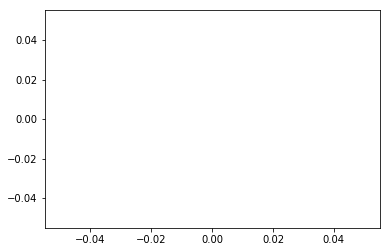

In [43]:
import matplotlib.pyplot as plt
plt.plot(loss_list)